## Dataset Formatter

In this notebook the dataset is organized in training and test sets. However we have to be clear about how the dataset is to be used when training by using hugging face.

The complete dataset contains 431698 samples with 12 characteristics that include the corresponding labels in one hot encoding.

The dataset will be organized as follows:

$\mathcal{X}_{train}\in \mathcal{R}^{341698 \times 12 } $

$\mathcal{X}_{test}\in \mathcal{R}^{90000 \times 12 } $


In [3]:
import pandas as pd
import numpy as np
import os
dir_root = os.getcwd()
dir_root


'/home/falconiel/CodePrograms/clasificaion_robos_fge'

In [4]:
dataset_total = pd.read_csv(os.path.join(dir_root, 'data/raw/dataset.csv'), converters={'NDD':str})
dataset_total.sample(5)

,NDD,RELATO,cantidad_palabras,Tipo_Delito_PJ,TARGET,LABELS_ROBO A DOMICILIO,LABELS_ROBO A PERSONAS,LABELS_ROBO A UNIDADES ECONOMICAS,"LABELS_ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEHICULOS",LABELS_ROBO DE CARROS,LABELS_ROBO DE MOTOS,LABELS
19794,030401816090095,es el caso señor fiscal que mediante parte de ...,43,ROBO,5,1,0,0,0,0,0,ROBO A DOMICILIO
116299,090101816124208,es el caso señor fiscal que el dia de hoy 19 d...,152,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
22174,040101821070036,por disposición del dr carlos rosero martínez ...,43,ROBO,2,0,0,0,0,1,0,ROBO DE CARROS
288575,170101814072676,el día de hoy a eso de las 9 40 en el sector d...,60,ROBO,4,0,0,0,1,0,0,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH..."
320196,170101816073353,este es el caso señor fiscal que el día doming...,92,ROBO,1,0,0,1,0,0,0,ROBO A UNIDADES ECONOMICAS


Some preprocessing

In [5]:
dataset_total.RELATO = dataset_total.RELATO.str.strip()
dataset_total.RELATO = dataset_total.RELATO.str.lower()
dataset_total.RELATO = dataset_total.RELATO.str.replace("[^A-Za-z0-9áéíóúÁÉÍÓÚñÑ]+", " ", regex=True)

In [6]:
from utils import camel_case_string_noPoint
new_names = []
for col in dataset_total.columns:
    new_names.append(camel_case_string_noPoint(col))
new_names

['ndd',
 'relato',
 'cantidadPalabras',
 'tipoDelitoPj',
 'target',
 'labelsRoboADomicilio',
 'labelsRoboAPersonas',
 'labelsRoboAUnidadesEconomicas',
 'labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos',
 'labelsRoboDeCarros',
 'labelsRoboDeMotos',
 'labels']

In [7]:
dataset_total.columns = new_names
dataset_total.sample(5)

,ndd,relato,cantidadPalabras,tipoDelitoPj,target,labelsRoboADomicilio,labelsRoboAPersonas,labelsRoboAUnidadesEconomicas,"labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos",labelsRoboDeCarros,labelsRoboDeMotos,labels
37366,070101815020424,adjunto parte policial 078 cr p oficio nro 201...,44,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
136339,090101818051717,es el caso señor fiscal que el día de hoy mart...,188,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
273957,132101814020002,mediante oficio no 2014 0982 pjm m se adjunta ...,40,ROBO,5,1,0,0,0,0,0,ROBO A DOMICILIO
295601,170101814124099,se remite parte policial no dcpio1400184 con o...,37,ROBO,5,1,0,0,0,0,0,ROBO A DOMICILIO
177930,090101821075147,indico a usted que día martes 27 de julio de 2...,153,ROBO,4,0,0,0,1,0,0,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH..."


Applying shuffle to the dataset in order to randomly order the samples in the data

In [8]:
from sklearn.utils import shuffle
dataset_total_shuffle = shuffle(dataset_total, random_state=42)
dataset_total_shuffle.reset_index(inplace=True)
dataset_total.shape, dataset_total_shuffle.shape

((431669, 12), (431669, 13))

In [9]:
TEST_SIZE = 90000
TRAIN_SIZE = dataset_total.shape[0] - TEST_SIZE
train_df = dataset_total_shuffle.iloc[0:TRAIN_SIZE, :]
test_df = dataset_total_shuffle.iloc[TRAIN_SIZE:, :]
# training_sentences = sentences[0:training_size]
# testing_sentences = sentences[training_size:]
# training_labels = labels[0:training_size]
# testing_labels = labels[training_size:]

In [10]:
train_df.tail()

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,target,labelsRoboADomicilio,labelsRoboAPersonas,labelsRoboAUnidadesEconomicas,"labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos",labelsRoboDeCarros,labelsRoboDeMotos,labels
341664,359676,170101819072824,es el caso señor fiscal que el día y la hora i...,127,ROBO,3,0,0,0,0,0,1,ROBO DE MOTOS
341665,239510,120501816060052,es el caso señor fiscal que yo trabajo en la e...,195,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
341666,423404,230201819030035,es el caso señor fiscal yo trabajo en creditos...,116,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
341667,22529,040501814090008,es el caso señor fiscal que el dia jueves cuat...,73,ROBO,4,0,0,0,1,0,0,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH..."
341668,27755,050501817050028,mediante parte policial se hace conocer que co...,73,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS


In [11]:
test_df.head()

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,target,labelsRoboADomicilio,labelsRoboAPersonas,labelsRoboAUnidadesEconomicas,"labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos",labelsRoboDeCarros,labelsRoboDeMotos,labels
341669,363568,170101819104159,el día de ayer 28 de octubre del 2019 a las 21...,186,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
341670,172755,090101821030695,es el caso señor fiscal que el día 04 de marzo...,105,ROBO,2,0,0,0,0,1,0,ROBO DE CARROS
341671,414181,220101819100206,es señor fiscal que el dia sabado 26 de octubr...,73,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
341672,142490,090101818110001,es el caso señor fiscal que el día de hoy 31 d...,111,ROBO,3,0,0,0,0,0,1,ROBO DE MOTOS
341673,72041,090101814031763,es el caso señor fiscal el dia 11 de marzo del...,43,ROBO,3,0,0,0,0,0,1,ROBO DE MOTOS


In [12]:
train_df.shape, test_df.shape

((341669, 13), (90000, 13))

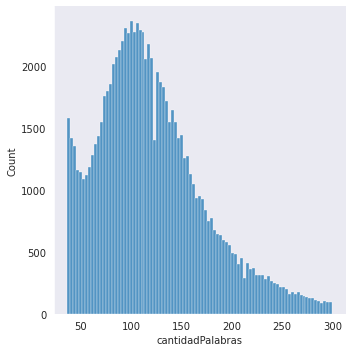

In [14]:
import seaborn as sns
sns.set_style('dark')
sns.displot(test_df.cantidadPalabras)

/home/falconiel/anaconda3/envs/fge_dir/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cantidadPalabras', ylabel='Density'>

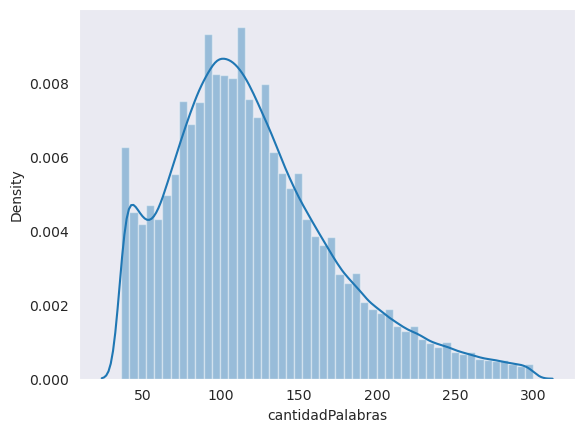

In [15]:
sns.distplot(train_df.cantidadPalabras)

In [ ]:
train_df.to_csv(os.path.join(dir_root,'data/interim/trainset.csv'), index=False)
test_df.to_csv(os.path.join(dir_root,'data/interim/testset.csv'), index=False)